In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/pierre/git/bo-on-graph


In [3]:
# test the GP cross validation
from problems import get_synthetic_problem
import torch
from search.trust_region import (
    restart,
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from search.utils import eigendecompose_laplacian


/home/pierre/miniconda3/envs/graph/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [112]:
# n = 100
# base_problem = get_synthetic_problem(
#     "diffusion", 
#     n=n, 
#     seed=0, 
#     problem_kwargs={
#         "log": False, 
#         "random_graph_type": "ws", 
#         "m": 2,
#         "p": 0.1,
#         "k": 4,
#         "fraction_infected": 2./n,
#         "beta": 0.2,
#         "gamma": 0.,
#         })
# n = 1000
# base_problem = get_synthetic_problem(
#     "centrality", 
#     n=n, 
#     seed=2,
#     problem_kwargs={
#         "log": True, 
#         "random_graph_type": "ba", #ba, ws, sbm
#         "m": 3,
#         # "p": 0.5,
#         # "p": [
#         #     [0.25, 0.02, 0.01], 
#         #     [0.02, 0.35, 0.07], 
#         #     [0.01, 0.07, 0.40]
#         #     ],
#         "sizes":  [75, 75, 300],
#         "k": 4,
#         "beta": 0.2,
#         "gamma": 0.,
#         "feature_name": "eigenvector_centrality"
#         }
#     )


n = 100
base_problem = get_synthetic_problem(
    "diffusion_real", 
    n=n, 
    seed=2,
    problem_kwargs={
        "log": False, 
        "random_graph_type": "real",
        "beta": 0.7,
        "gamma": 0.01,
        "fraction_infected": 1e-3,
        "epsilon": 0.05,
        "iteration_diffusion": 30
        }
    )

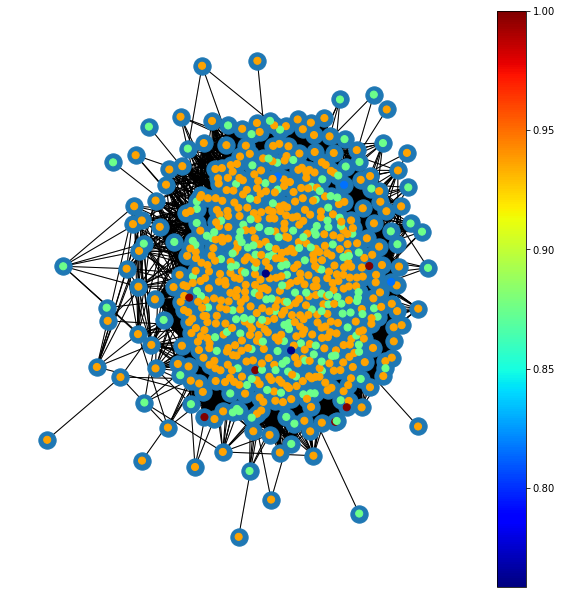

In [115]:
import networkx as nx
pos = nx.kamada_kawai_layout(base_problem.context_graph)
#pos = nx.spring_layout(base_problem.context_graph)
g = base_problem.context_graph
nodes = base_problem.context_graph.nodes()

all_X = torch.arange(len(base_problem.context_graph)).to(torch.float)
all_Y = base_problem(all_X.reshape(-1, 1))
# all_Y = eigenvecs[:, 0]
colors = all_Y
plt.figure(figsize=[8, 8])
nx.draw(base_problem.context_graph, pos)
ec = nx.draw_networkx_edges(g, pos, alpha=0.2, )
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=50, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.savefig( "realdiffusion.pdf",bbox_inches='tight')
plt.show()